In [42]:
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [34]:
best_gfs = TDSCatalog('https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')

In [35]:
best_ds = best_gfs.datasets[0]
print(best_ds)

Best GFS Quarter Degree Forecast Time Series


In [36]:
ds = xr.open_dataset(best_ds.access_urls['OPENDAP'])

In [37]:
ice = ds.metpy.parse_cf('Ice_cover_surface')
ice

<xarray.DataArray 'Ice_cover_surface' (time: 121, lat: 721, lon: 1440)>
[125627040 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-11-26 ... 2021-12-15T12:00:00
    reftime    (time) datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Ice cover @ Ground or water surface
    units:                          
    abbreviation:                   ICEC
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_10-2-0_L1
    Grib2_Parameter:                [10  2  0]
    Grib2_Parameter_Discipline:     Oceanographic products
    Grib2_Parameter_Category:       Ice
    Grib2_Parameter_Name:           Ice cover
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

In [38]:
first_ice = ice.isel(time=0)

In [39]:
first_ice

<xarray.DataArray 'Ice_cover_surface' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time       datetime64[ns] 2021-11-26
    reftime    datetime64[ns] 2021-11-26
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                      Ice cover @ Ground or water surface
    units:                          
    abbreviation:                   ICEC
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_10-2-0_L1
    Grib2_Parameter:                [10  2  0]
    Grib2_Parameter_Discipline:     Oceanographic products
    Grib2_Parameter_Category:       Ice
    Grib2_Parameter_Name:           Ice cover
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Forecast

In [40]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'GeoAxesSubplot' object has no attribute 'countourf'

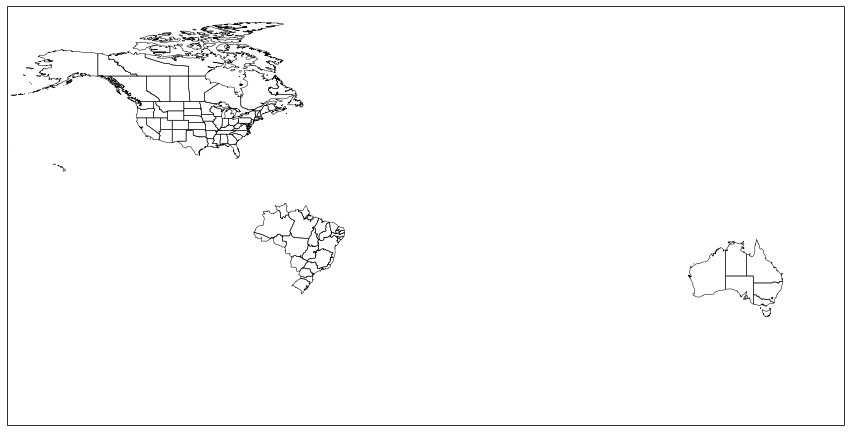

In [41]:
fig = plt.figure(figsize=(15, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)

cf = ax.countourf(first_ice.lon, first_ice.lat, first_ice, transform=ccrs.PlateCarree(), zorder=0, cmap='coolwarm')